In [43]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT ML UTILITIES
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# LOAD DATASET USING PANDAS
dataframe = pd.read_csv("height_weight_regression_500.csv")
dataframe.head()

,Height_cm,Weight_kg
0,173.0,60.3
1,166.6,59.5
2,174.5,50.0
3,183.2,67.7
4,165.7,45.8


In [4]:
# CHECK IF THERE'S ANY NULL DATA
dataframe.isnull().sum()

Height_cm    0
Weight_kg    0
dtype: int64

<Axes: ylabel='Weight_kg'>

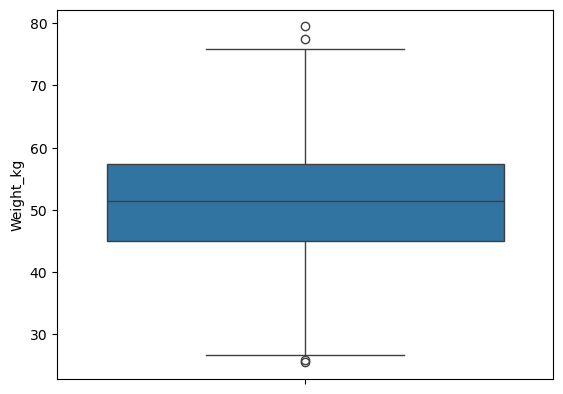

In [13]:
# VISUALIZE THE DATA
sns.boxplot(dataframe['Weight_kg'])

In [15]:
# SET THE UPPER AND LOWER LIMIT USNG 3-SIGMA RULE(STANDARD DEVIATION)
upper_limit = dataframe['Weight_kg'].mean() + 3*dataframe['Weight_kg'].std()
lower_limit = dataframe['Weight_kg'].mean() - 3*dataframe['Weight_kg'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 80.06169163172224
lower limit: 22.70430836827775


In [19]:
# IDENTIFY OUTLIERS
dataframe.loc[(dataframe['Weight_kg'] > upper_limit) | (dataframe['Weight_kg'] < lower_limit)]

,Height_cm,Weight_kg


In [20]:
# NO OUTLIERS DETECTED USING PREVIOUS METHOD
new_df = dataframe.loc[(dataframe['Weight_kg'] <= upper_limit) & (dataframe['Weight_kg'] >= lower_limit)]

In [21]:
new_df.head()

,Height_cm,Weight_kg
0,173.0,60.3
1,166.6,59.5
2,174.5,50.0
3,183.2,67.7
4,165.7,45.8


In [22]:
new_df.reset_index(inplace=True)

<Axes: ylabel='Weight_kg'>

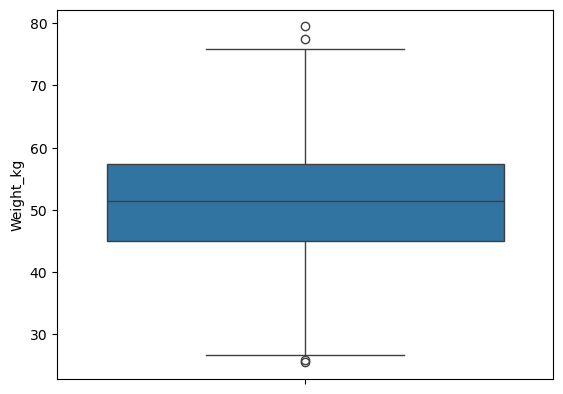

In [23]:
sns.boxplot(new_df['Weight_kg'])

In [24]:
df2 = new_df.copy()

In [25]:
df2.loc[(df2['Weight_kg']>=upper_limit),'Weight_kg']=upper_limit
df2.loc[(df2['Weight_kg']<=lower_limit),'Weight_kg']=lower_limit

500

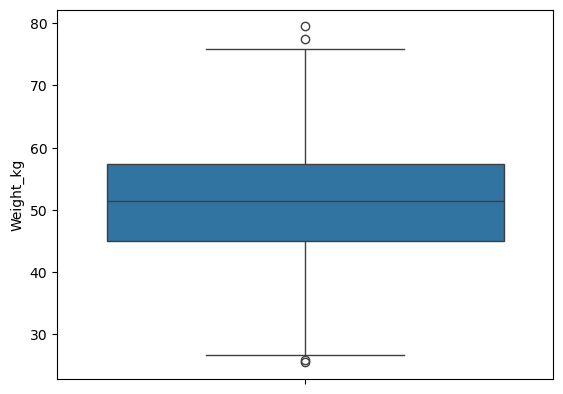

In [26]:
sns.boxplot(df2['Weight_kg'])
len(df2)

In [27]:
# NOW WE DETECT OUTLIERS USING IQR METHOD
q1 = dataframe['Weight_kg'].quantile(0.25)
q3 = dataframe['Weight_kg'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(np.float64(45.075), np.float64(57.4), np.float64(12.324999999999996))

In [28]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(np.float64(26.58750000000001), np.float64(75.88749999999999))

<Axes: ylabel='Weight_kg'>

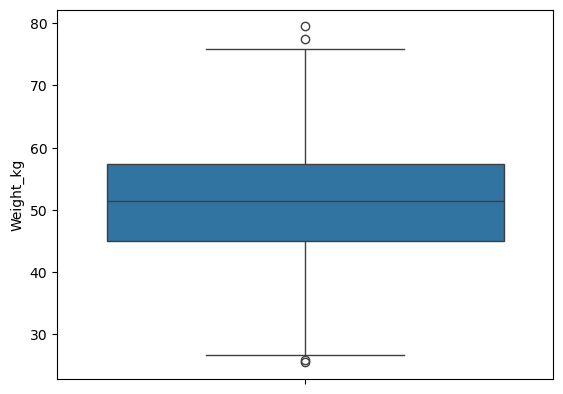

In [30]:
# VISUAL CHECK
sns.boxplot(dataframe['Weight_kg'])

In [31]:
# IDENTIFY OUTLIERS
dataframe.loc[(dataframe['Weight_kg'] > upper_limit) | (dataframe['Weight_kg'] < lower_limit)]

,Height_cm,Weight_kg
44,153.2,25.5
179,190.0,77.4
209,190.0,79.5
221,149.3,25.8


In [33]:
# REMOVE OUTLIERS
new_df = dataframe.loc[(dataframe['Weight_kg'] <= upper_limit) & (dataframe['Weight_kg'] >= lower_limit)]
print('before removing outliers:', len(dataframe))
print('after removing outliers:',len(new_df))
print('outliers:', len(dataframe)-len(new_df))

before removing outliers: 500
after removing outliers: 496
outliers: 4


In [34]:
new_df.reset_index(inplace=True)

<Axes: ylabel='Weight_kg'>

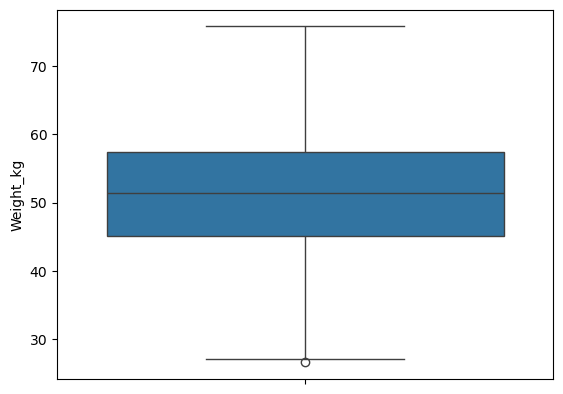

In [35]:
sns.boxplot(new_df['Weight_kg'])

In [36]:
# INSTEAD OF REMOVING, CAP EXTREME VALUES
new_df = dataframe.copy()
new_df.loc[(new_df['Weight_kg']>upper_limit), 'Weight_kg'] = upper_limit
new_df.loc[(new_df['Weight_kg']<lower_limit), 'Weight_kg'] = lower_limit

<Axes: ylabel='Weight_kg'>

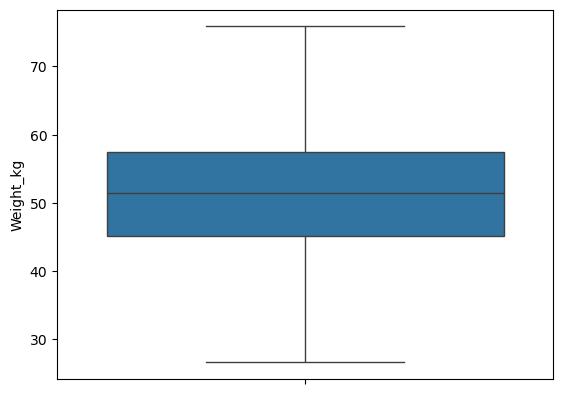

In [37]:
sns.boxplot(new_df['Weight_kg'])

Text(0, 0.5, 'Weight_kg')

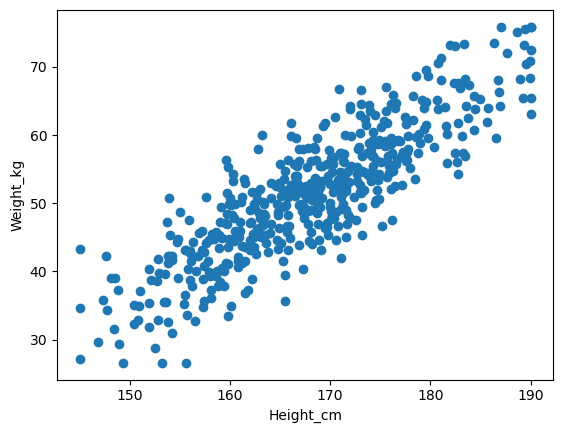

In [38]:
# PLOT THE NEW DATA AFTER REMOVING OUTLIERS
plt.scatter(new_df['Height_cm'],new_df['Weight_kg'])
plt.xlabel('Height_cm')
plt.ylabel('Weight_kg')

In [39]:
# FEATURE AND TARGER SELECTION
X = new_df.iloc[:,0:1]
y = new_df.iloc[:,-1]

In [40]:
X,y

(     Height_cm
 0        173.0
 1        166.6
 2        174.5
 3        183.2
 4        165.7
 ..         ...
 495      173.4
 496      157.6
 497      166.1
 498      159.2
 499      154.2
 
 [500 rows x 1 columns],
 0      60.3
 1      59.5
 2      50.0
 3      67.7
 4      45.8
        ... 
 495    54.6
 496    50.9
 497    52.7
 498    40.5
 499    41.6
 Name: Weight_kg, Length: 500, dtype: float64)

In [42]:
# TRAIN-TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
# MODEL TRAINING USING LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
X_test

,Height_cm
129,163.0
280,169.1
440,171.8
384,160.4
225,178.9
...,...
387,186.8
117,156.3
468,162.7
395,163.3


In [48]:
y_test

129    52.1
280    53.1
440    48.3
384    47.8
225    60.1
       ... 
387    66.3
117    44.3
468    46.2
395    50.2
146    26.6
Name: Weight_kg, Length: 100, dtype: float64

In [50]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\heer0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.21294398])

Text(0, 0.5, 'Weight_kg')

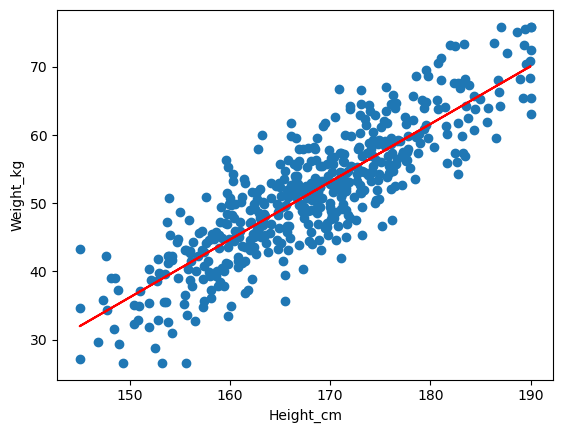

In [51]:
# MODEL VISUALIZATION
plt.scatter(new_df['Height_cm'],new_df['Weight_kg'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Height_cm').
plt.ylabel('Weight_kg')

In [60]:
# MODEL PARAMETERS 
m = lr.coef_
b = lr.intercept_

# PREDICT WEIGHT OF A PERSON USING HEIGHT AS 170 cm 
y =  m * 170 + b
y

array([53.14676687])

In [61]:
# MODEL EVALUATION
y_predection  = lr.predict(X_test)
y_predection

array([47.21294398, 52.38384678, 54.67260704, 45.00895262, 60.69119883,
       64.59056816, 50.26462432, 52.04477119, 39.15989863, 62.55611459,
       65.35348824, 48.82355305, 58.14813188, 52.04477119, 44.92418372,
       51.96000229, 58.14813188, 49.58647314, 51.36662   , 51.5361578 ,
       41.27912109, 55.77460272, 40.8552766 , 52.97722907, 62.97995909,
       44.50033923, 43.73741915, 54.07922475, 56.36798501, 63.91241697,
       39.41420533, 59.50443425, 52.29907789, 40.8552766 , 42.29634787,
       52.89246017, 58.48720747, 58.48720747, 70.10054655, 49.75601093,
       49.41693534, 46.87386839, 37.80359626, 44.58510813, 59.33489645,
       47.12817508, 51.19708221, 60.35212323, 62.55611459, 50.34939322,
       50.26462432, 47.29771288, 57.97859408, 53.31630467, 70.10054655,
       55.77460272, 51.36662   , 59.92827874, 42.63542347, 54.16399365,
       45.51756601, 59.25012756, 45.43279711, 69.50716426, 43.99172584,
       62.217039  , 35.5996049 , 50.85800661, 57.72428738, 49.58

In [62]:
# NOW CHECK THE MODEL ACCURACY USING R² SCORE
rr = r2_score(y_test,y_predection)
rr

0.7525702058626627